<a href="https://www.kaggle.com/code/notsau/customer-classification?scriptVersionId=161459472" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("/kaggle/input/customer/train.csv")
df2=pd.read_csv("/kaggle/input/customer/test.csv")

# EDA

In [3]:
df1.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df=pd.concat([df1,df2])

In [5]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [6]:
df.isnull().sum()

id                      0
CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

In [7]:
df2.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

# Feature Engineering

In [8]:
df=df.drop(["CustomerId","Surname"],axis=1)

In [9]:
df['Exited'] = df['Exited'].fillna(np.nan)
dolu=df[df["Exited"].notnull()]
bos=df[df["Exited"].isnull()]

y=dolu["Exited"]
x=dolu.drop("Exited",axis=1)
#axis=0 satır, 1 sütun siler

x=pd.get_dummies(x,drop_first=True)

# Modelling

In [10]:
from pycaret.classification import*

In [11]:
setup(dolu,target="Exited")

,Description,Value
0,Session id,1404
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(165034, 12)"
4,Transformed data shape,"(165034, 14)"
5,Transformed train set shape,"(115523, 14)"
6,Transformed test set shape,"(49511, 14)"
7,Ordinal features,1
8,Numeric features,9
9,Categorical features,2


In [12]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8644,0.8883,0.5557,0.7386,0.6342,0.5529,0.5614,0.4550
gbc,Gradient Boosting Classifier,0.8636,0.8876,0.5362,0.7476,0.6245,0.5439,0.5551,5.2630
ada,Ada Boost Classifier,0.8601,0.8793,0.5216,0.7408,0.6121,0.5299,0.5421,1.3810
rf,Random Forest Classifier,0.8599,0.8760,0.5313,0.7333,0.6161,0.5331,0.5435,4.0330
et,Extra Trees Classifier,0.8571,0.8729,0.5152,0.7302,0.6041,0.5201,0.5319,2.5480
lda,Linear Discriminant Analysis,0.8324,0.8171,0.4074,0.6712,0.5071,0.4133,0.4320,0.1790
ridge,Ridge Classifier,0.8275,0.0000,0.3011,0.7213,0.4248,0.3429,0.3884,0.1340
dt,Decision Tree Classifier,0.7970,0.7024,0.5385,0.5196,0.5289,0.3995,0.3997,0.3160
nb,Naive Bayes,0.7925,0.7696,0.1888,0.5274,0.2780,0.1873,0.2213,0.1340
dummy,Dummy Classifier,0.7884,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1220


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1404, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [13]:
best_model=create_model("lightgbm")
#en iyi modelin lightgbm olduğunu gördük ve onu tekrar çalıştırdık

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8641,0.8899,0.5509,0.7405,0.6318,0.5507,0.5597
1,0.8673,0.8929,0.5751,0.7400,0.6472,0.5670,0.5739
2,0.8669,0.8863,0.5616,0.7466,0.6410,0.5613,0.5699
3,0.8622,0.8889,0.5561,0.7283,0.6306,0.5478,0.5553
4,0.8617,0.8850,0.5405,0.7355,0.6231,0.5408,0.5504
5,0.8644,0.8864,0.5511,0.7417,0.6324,0.5515,0.5606
6,0.8599,0.8868,0.5442,0.7248,0.6216,0.5378,0.5461
7,0.8653,0.8866,0.5569,0.7421,0.6363,0.5557,0.5643
8,0.8657,0.8885,0.5595,0.7423,0.6381,0.5576,0.5660


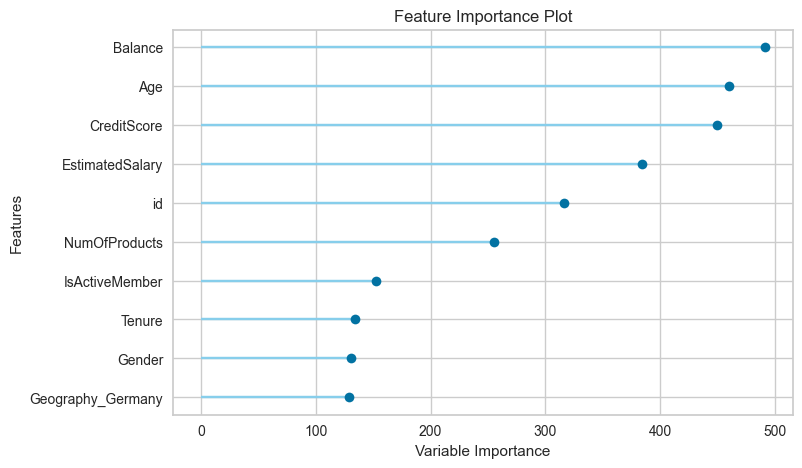

In [14]:
plot_model(best_model,plot="feature")
#sütunların ne kadar etkili olduğunu gösteren grafik

In [15]:
best_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1404, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [16]:
predictions = predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8673,0.8902,0.5682,0.7442,0.6444,0.5646,0.5724


In [17]:
predictions.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,prediction_label,prediction_score
158074,158074,749,Germany,Female,29.0,7,103700.273438,2,1.0,1.0,174769.203125,0.0,0,0.9480
92854,92854,637,France,Male,33.0,8,0.000000,1,0.0,1.0,148769.078125,1.0,0,0.8912
109431,109431,725,Germany,Male,35.0,3,207034.953125,2,1.0,1.0,186948.343750,0.0,0,0.9729
114107,114107,706,France,Male,35.0,1,0.000000,2,1.0,0.0,158043.109375,0.0,0,0.9809
1291,1291,683,France,Male,57.0,9,0.000000,2,1.0,0.0,182025.953125,0.0,0,0.5366


In [18]:
predictions["prediction_label"].value_counts()

0    41513
1     7998
Name: prediction_label, dtype: int64

In [19]:
dolu.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0


In [20]:
submission_df = pd.DataFrame({'id': predictions['id'], 'Exited': predictions["prediction_label"]})
submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,id,Exited
158074,158074,0
92854,92854,0
109431,109431,0
114107,114107,0
1291,1291,0
